<a href="https://colab.research.google.com/github/SzymonNowakowski/Machine-Learning-2024/blob/master/Lab05_kernel-methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5 - Kernel Methods

### Author: Szymon Nowakowski


# Introduction to Kernel Methods  
-----------------------  

Kernel methods are a class of machine learning techniques that enable models to capture complex relationships in data by mapping inputs into high-dimensional feature spaces. Instead of working directly with raw features, kernel methods rely on kernel functions that compute inner products in these transformed spaces, allowing models to discover nonlinear patterns while avoiding explicit feature transformations.  

The fundamental idea behind kernel methods is to leverage the **kernel trick**, which replaces explicit high-dimensional computations with efficient similarity measurements. This approach is particularly useful in algorithms like **Support Vector Machines (SVMs)**, **kernel regression**, and **Gaussian processes**, where the goal is to find decision boundaries or make predictions in feature spaces that may be infeasible to compute directly.  

Kernel methods are crucial for problems where linear models fail to capture the underlying structure, enabling flexible, nonlinear decision functions without excessive computational cost. They also provide a principled framework for incorporating domain knowledge through custom kernel functions, making them widely applicable across diverse fields such as bioinformatics, computer vision, and natural language processing.


# Support Vector Machines (SVMs) and Margin Boundaries for Separable Case
------------------------

In **Support Vector Machines (SVMs)**, we want to find the **maximum margin separator**, which is a hyperplane that separates two classes while maximizing the margin. The **decision boundary** is given by:

$$ w^\top x + b = 0 $$

However, the margin itself is defined by **two additional hyperplanes** that run parallel to the decision boundary. These **margin boundaries** are:

$$ w^\top x + b = +1 \quad \text{(for the positive class)} $$  
$$ w^\top x + b = -1 \quad \text{(for the negative class)} $$  

These specific values $ \pm 1 $ come from the **normalization condition** we impose during the SVM optimization.





## 1. The Role of the Margin Boundaries

We want to ensure that all correctly classified points satisfy:

$$ y_i (w^\top x_i + b) \geq 1, \quad \forall i. $$

This means:

- If $ y_i = +1 $ (positive class), we require:

  $$ w^\top x_i + b \geq 1. $$

- If $ y_i = -1 $ (negative class), we require:

  $$ w^\top x_i + b \leq -1. $$

These two conditions define **two parallel hyperplanes** that **contain the closest data points** (support vectors).


## Figure 12.1 (left) from *The Elements of Statistical Learning*

We shall reproduce Figure 12.1 (left - separable case) from *The Elements of Statistical Learning*

📚 **See also** → *The Elements of Statistical Learning*:  
Trevor Hastie, Robert Tibshirani, and Jerome Friedman, Springer, 2009.  
[📖 Link to the book](https://hastie.su.domains/ElemStatLearn/)
(Chapter 12, Figure 12.1)


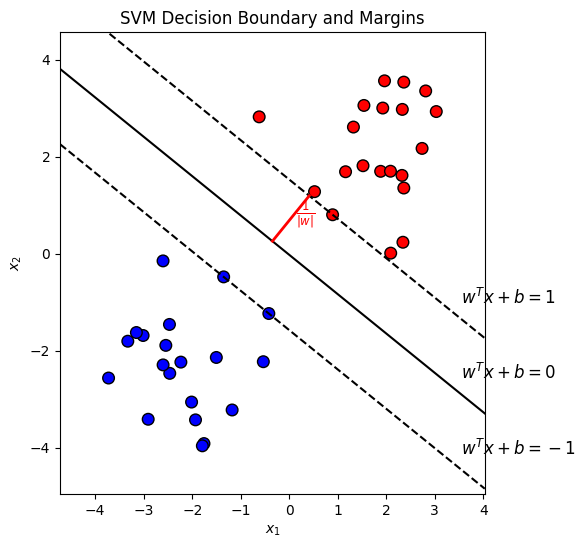

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# 1. Generate linearly separable data
np.random.seed(42)
X = np.r_[
    np.random.randn(20, 2) - [2, 2],
    np.random.randn(20, 2) + [2, 2]
]
y = np.array([0]*20 + [1]*20)

# 2. Train a linear SVM classifier (clf)
clf = SVC(kernel='linear', C=1e5)
clf.fit(X, y)

# Extract parameters w and b from the trained model
w = clf.coef_[0]      # [w1, w2]
b = clf.intercept_[0] # scalar bias

# 3. Create a grid of x-values for plotting the decision boundary and margins
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x_plot = np.linspace(x_min, x_max, 200)

# Decision boundary: w^T x + b = 0 ==> x2 = -(w1*x1 + b)/w2
def line_y(x, offset=0.0):
    return -(w[0]*x + (b - offset)) / w[1]

y_decision = line_y(x_plot, offset=0)
y_margin_plus = line_y(x_plot, offset=1)   # w^T x + b = 1
y_margin_minus = line_y(x_plot, offset=-1) # w^T x + b = -1

# 4. Plot the data points
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=70)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim(x_min, x_max)
plt.ylim(X[:, 1].min()-1, X[:, 1].max()+1)
plt.title('SVM Decision Boundary and Margins')

# Plot the decision boundary (solid line)
plt.plot(x_plot, y_decision, 'k-')
# Plot the margins (dashed lines)
plt.plot(x_plot, y_margin_plus, 'k--')
plt.plot(x_plot, y_margin_minus, 'k--')

# 5. Label the lines directly on the plot (instead of using a legend)
# Choose some x-value near the right side for placing text
x_text = x_max - 0.5
# Decision boundary label
y_text_decision = line_y(x_text, offset=0)
plt.text(x_text, y_text_decision + 0.3, r'$w^T x + b = 0$', fontsize=12)

# +1 margin label
y_text_plus = line_y(x_text, offset=1)
plt.text(x_text, y_text_plus + 0.3, r'$w^T x + b = 1$', fontsize=12)

# -1 margin label
y_text_plus = line_y(x_text, offset=-1)
plt.text(x_text, y_text_plus + 0.3, r'$w^T x + b = -1$', fontsize=12)

# 6. Draw and label the orthogonal distance 1/||w||
# Pick a point on the decision boundary in the middle of the plot
x_center = (x_min + x_max) / 2
y_center = line_y(x_center, offset=0)  # on the boundary
center_point = np.array([x_center, y_center])

# The direction normal to the boundary is parallel to w
w_norm = np.linalg.norm(w)
direction = w / w_norm

# One endpoint on the decision boundary, the other on the margin w^T x + b = 1
# The distance between them along w is 1 / ||w||
margin_point = center_point + (1 / w_norm) * direction

# Plot the orthogonal line segment
plt.plot([center_point[0], margin_point[0]],
         [center_point[1], margin_point[1]], 'r-', lw=2)

# Label the distance 1/||w|| near the midpoint of that segment
mid_point = (center_point + margin_point) / 2
plt.text(mid_point[0] + 0.1, mid_point[1], r'$\frac{1}{\|w\|}$', color='r', fontsize=12)


plt.gca().set_aspect('equal')   #make the plot exactly square to keep orthogonal lines - well, orthogonal
plt.show()

## The Margin

The margin size is the distance between the margin boundaries (which are represented by the hyperplanes $ w^T x + b = \pm 1 $).
The distance between these two hyperplanes is given by:

$$ \frac{2}{\|w\|} $$

This result comes from the fact that the perpendicular distance from a point $x$ to the decision boundary is:

$$ \frac{|w^T x + b|}{\|w\|} $$

## Minimization Problem

Maximizing the margin,

$$ \frac{2}{\|w\|} $$

is equivalent to minimizing $\|w\|$, and for mathematical convenience, it is standard to minimize:

$$ \frac{1}{2}\|w\|^2 $$

This leads to the following constrained optimization problem:

$$ \min_{w, b} \frac{1}{2}\|w\|^2 $$

subject to the constraints:

$$ y_i (w^T x_i + b) \geq 1, \quad \forall i $$

where $y_i \in \{-1, 1\}$ are the class labels. This formulation ensures that all data points are correctly classified and lie outside or exactly on the margin boundaries while maximizing the margin size.

This is exactly the formulation of the problem solved in a
`sklearn.svm.SVC` call in the code above.



# Support Vector Machines (SVMs) and Margin Boundaries for Non-Separable Case

------------------------

In **Support Vector Machines (SVMs)**, the non-separable case occurs when the data cannot be perfectly separated by a linear hyperplane. To handle this, **slack variables** (pl. *zmienne pomocnicze w kontekście SVM z miękkim marginesem, zmienne luzu*) are introduced, allowing some misclassifications while still aiming to find the best possible hyperplane that maximizes the margin.

The decision boundary is still given by:

$$ w^\top x + b = 0 $$

However, we now introduce **slack variables** $ \xi_i \geq 0 $ for each data point to allow some points to lie inside the margin or on the wrong side of the hyperplane.



## The Role of Slack Variables

In the non-separable case, the constraints become:

$$ y_i (w^\top x_i + b) \geq 1 - \xi_i, \quad \forall i. $$

This means:

- If $ \xi_i = 0 $, the point is correctly classified and lies outside or exactly on the margin boundary.
- If $ 0 < \xi_i < 1 $, the point lies inside the margin but is still correctly classified.
- If $ \xi_i \geq 1 $, the point is misclassified.

The goal is to balance maximizing the margin and minimizing the total slack.



## The Optimization Problem for the Soft Margin SVM

This approach is often referred to as a **Soft Margin SVM** (pl. *SVM z miękkim marginesem*), as it allows the decision boundary to be flexible, tolerating some violations of the margin constraints for better generalization.

The SVM optimization problem for the non-separable case is:

$$ \min_{w, b, \xi} \left( \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} \xi_i \right) $$

subject to:

$$ y_i (w^\top x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0, \quad \forall i. $$

Here, $ C > 0 $ is a **regularization parameter** that controls the trade-off between maximizing the margin and minimizing the misclassification error:

- A **large $C$** emphasizes minimizing slack variables, leading to fewer misclassifications but possibly a smaller margin.
- A **small $C$** allows more misclassifications, potentially leading to a larger margin.


The final decision function remains:

$$ f(x) = \text{sign}(w^\top x + b) $$

but it now reflects the balance between margin size and classification accuracy.





## Figure 12.1 (right) from *The Elements of Statistical Learning*

We shall reproduce Figure 12.1 (right - non-separable case) from *The Elements of Statistical Learning*

📚 **See also** → *The Elements of Statistical Learning*:  
Trevor Hastie, Robert Tibshirani, and Jerome Friedman, Springer, 2009.  
[📖 Link to the book](https://hastie.su.domains/ElemStatLearn/)
(Chapter 12, Figure 12.1)


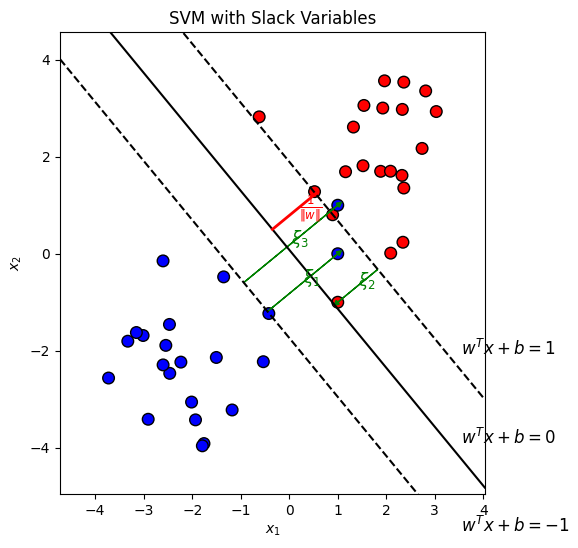

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# 1. Generate linearly separable data with 3 non-separable points
np.random.seed(42)
X = np.r_[
    np.random.randn(20, 2) - [2, 2],
    np.random.randn(20, 2) + [2, 2]
]
y = np.array([0]*20 + [1]*20)

# Add 3 non-separable points.
X = np.vstack([X, [[1, 0], [1, -1], [1, 1]]])
y = np.hstack([y, [0, 1, 0]])  # Assign classes

# 2. Train a linear SVM classifier (clf)
clf = SVC(kernel='linear', C=1e5)
clf.fit(X, y)

# Extract parameters w and b from the trained model
w = clf.coef_[0]      # [w1, w2]
b = clf.intercept_[0] # scalar bias

# 3. Create a grid of x-values for plotting the decision boundary and margins
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x_plot = np.linspace(x_min, x_max, 200)

# Decision boundary: w^T x + b = 0 ==> x2 = -(w1*x1 + b)/w2
def line_y(x, offset=0.0):
    return -(w[0]*x + (b - offset)) / w[1]

y_decision = line_y(x_plot, offset=0)
y_margin_plus = line_y(x_plot, offset=1)   # w^T x + b = 1
y_margin_minus = line_y(x_plot, offset=-1) # w^T x + b = -1

# 4. Plot the data points
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=70)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim(x_min, x_max)
plt.ylim(X[:, 1].min()-1, X[:, 1].max()+1)
plt.title('SVM with Slack Variables')

# Plot the decision boundary (solid line)
plt.plot(x_plot, y_decision, 'k-')
# Plot the margins (dashed lines)
plt.plot(x_plot, y_margin_plus, 'k--')
plt.plot(x_plot, y_margin_minus, 'k--')

# Label the decision boundary and margins
x_text = x_max - 0.5
y_text_decision = line_y(x_text, offset=0)
plt.text(x_text, y_text_decision + 0.3, r'$w^T x + b = 0$', fontsize=12)

y_text_plus = line_y(x_text, offset=1)
plt.text(x_text, y_text_plus + 0.3, r'$w^T x + b = 1$', fontsize=12)

y_text_minus = line_y(x_text, offset=-1)
plt.text(x_text, y_text_minus + 0.3, r'$w^T x + b = -1$', fontsize=12)

# 5. Mark non-separable points with arrows and labels
non_separable_points = X[-3:]
labels = [r'$\xi_1$', r'$\xi_2$', r'$\xi_3$']

for i, (point, label) in enumerate(zip(non_separable_points, labels)):
    # Calculate projection onto margin
    margin_offset = 1 if y[-3:][i] == 1 else -1
    margin_point = point - ((w @ point + b - margin_offset) / np.dot(w, w)) * w

    # Draw arrow
    plt.arrow(margin_point[0], margin_point[1],
              point[0] - margin_point[0], point[1] - margin_point[1],
              head_width=0.1, head_length=0.1, fc='green', ec='green')

    # Label the slack variable
    mid_x = (point[0] + margin_point[0]) / 2
    mid_y = (point[1] + margin_point[1]) / 2
    plt.text(mid_x, mid_y, label, fontsize=12, color='green')

# 6. Draw and label the orthogonal distance 1/||w||
x_center = (x_min + x_max) / 2
y_center = line_y(x_center, offset=0)
center_point = np.array([x_center, y_center])

w_norm = np.linalg.norm(w)
direction = w / w_norm

margin_point = center_point + (1 / w_norm) * direction

plt.plot([center_point[0], margin_point[0]],
         [center_point[1], margin_point[1]], 'r-', lw=2)

mid_point = (center_point + margin_point) / 2
plt.text(mid_point[0] + 0.1, mid_point[1], r'$\frac{1}{\|w\|}$', color='r', fontsize=12)

plt.gca().set_aspect('equal')
plt.show()

## Task

Explain: why, after we add the three candidate non-separable points in the code below (by uncommenting the two commented lines) we get a surprising, well separated chart. Shouldn't the $\xi$ variables be introduced, instead?

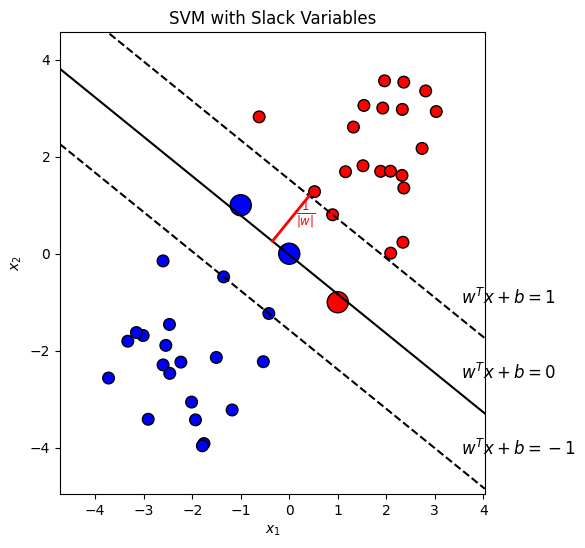

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# 1. Generate linearly separable data with 3 non-separable points
np.random.seed(42)
X = np.r_[
    np.random.randn(20, 2) - [2, 2],
    np.random.randn(20, 2) + [2, 2]
]
y = np.array([0]*20 + [1]*20)


# Mark 3 candidates non-separable points, DO NOT add them to the classifier yet
X1 = np.vstack([[[0, 0], [1, -1], [-1, 1]]])
y1 = np.hstack([[0, 1, 0]])  # Assign classes
plt.figure(figsize=(6, 6))
plt.scatter(X1[:, 0], X1[:, 1], c=y1, cmap='bwr', edgecolors='k', s=230)

####################### TWO LINES TO UNCOMMENT ########################
############ THEY ADD THE 3 POINTS TO THE CLASSIFIER DATA #############

# X = np.vstack([X, X1])
# y = np.hstack([y, y1])  # Assign classes

#######################################################################




# 2. Train a linear SVM classifier (clf)
clf = SVC(kernel='linear', C=1e5)
clf.fit(X, y)

# Extract parameters w and b from the trained model
w = clf.coef_[0]      # [w1, w2]
b = clf.intercept_[0] # scalar bias

# 3. Create a grid of x-values for plotting the decision boundary and margins
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x_plot = np.linspace(x_min, x_max, 200)

# Decision boundary: w^T x + b = 0 ==> x2 = -(w1*x1 + b)/w2
def line_y(x, offset=0.0):
    return -(w[0]*x + (b - offset)) / w[1]

y_decision = line_y(x_plot, offset=0)
y_margin_plus = line_y(x_plot, offset=1)   # w^T x + b = 1
y_margin_minus = line_y(x_plot, offset=-1) # w^T x + b = -1

# 4. Plot the data points

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=70)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim(x_min, x_max)
plt.ylim(X[:, 1].min()-1, X[:, 1].max()+1)
plt.title('SVM with Slack Variables')

# Plot the decision boundary (solid line)
plt.plot(x_plot, y_decision, 'k-')
# Plot the margins (dashed lines)
plt.plot(x_plot, y_margin_plus, 'k--')
plt.plot(x_plot, y_margin_minus, 'k--')

# Label the decision boundary and margins
x_text = x_max - 0.5
y_text_decision = line_y(x_text, offset=0)
plt.text(x_text, y_text_decision + 0.3, r'$w^T x + b = 0$', fontsize=12)

y_text_plus = line_y(x_text, offset=1)
plt.text(x_text, y_text_plus + 0.3, r'$w^T x + b = 1$', fontsize=12)

y_text_minus = line_y(x_text, offset=-1)
plt.text(x_text, y_text_minus + 0.3, r'$w^T x + b = -1$', fontsize=12)

# 6. Draw and label the orthogonal distance 1/||w||
x_center = (x_min + x_max) / 2
y_center = line_y(x_center, offset=0)
center_point = np.array([x_center, y_center])

w_norm = np.linalg.norm(w)
direction = w / w_norm

margin_point = center_point + (1 / w_norm) * direction

plt.plot([center_point[0], margin_point[0]],
         [center_point[1], margin_point[1]], 'r-', lw=2)

mid_point = (center_point + margin_point) / 2
plt.text(mid_point[0] + 0.1, mid_point[1], r'$\frac{1}{\|w\|}$', color='r', fontsize=12)

plt.gca().set_aspect('equal')
plt.show()


# Kernel Formulation

--------------------------------------------------

Consider the SVM optimization problem for the **non-separable case**:

$$ \min_{w, b, \xi} \left( \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} \xi_i \right) $$

subject to the constraints:

$$ y_i (w^\top x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0, \quad \forall i. $$

If we attempt to map the input data $x$ into a higher-dimensional feature space using a transformation $x \rightarrow \phi(x)$, this would lead to a highly complex optimization problem. This complexity arises because the primal formulation directly involves both $\|w\|$ and the explicit mapping $\phi(x)$, making the computations in high-dimensional spaces computationally expensive and often infeasible (especially for infinite-dimensional transforms).

To efficiently handle such cases, the **dual formulation** of SVM is preferred, as it allows the use of kernel functions to compute inner products in the transformed space without explicitly calculating $\phi(x)$.



## The Dual Problem

The dual problem flips the optimization perspective. Instead of optimizing over $x$, it optimizes over the Lagrange multipliers.




### The Dual Problem for Soft Margin SVM

We can derive the **dual problem** to be:

$$
\max_{\alpha} \sum_{i=1}^{n} \alpha_i - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_i \alpha_j y_i y_j (x_i^\top x_j)
$$

subject to:

$$
\sum_{i=1}^{n} \alpha_i y_i = 0, \quad 0 \leq \alpha_i \leq C
$$

This formulation depends **only on inner products** $x_i^\top x_j$, making it compatible with the **kernel trick**.


### The Mapping $\phi$

Suppose we want to map $x$ into a higher-dimensional space, or even an infinite-dimensional space, using the mapping $x \rightarrow \phi(x)$. The linear decision boundaries in the high dimensional space would transform into complex and non-linear decision boundaries in our original data space.

After applying the mapping $x \rightarrow \phi(x)$, the dual problem becomes:

$$
\max_{\alpha} \sum_{i=1}^{n} \alpha_i - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_i \alpha_j y_i y_j (\phi(x_i)^T \phi(x_j))
$$

subject to:

$$
\sum_{i=1}^{n} \alpha_i y_i = 0, \quad 0 \leq \alpha_i \leq C
$$

Here, the inner product $x_i^T x_j$ is replaced by $\phi(x_i)^T \phi(x_j)$, representing the inner product in the higher-dimensional feature space. However, using the **kernel trick**, we can compute this inner product directly through a kernel function $K(x_i, x_j)$ without explicitly calculating $\phi(x)$.


### The Kernelized Dual Formula

In the dual problem we will use the kernel function:

$$
K(x_i, x_j) = \phi(x_i)^\top \phi(x_j)
$$

This substitution allows the SVM to operate ***as if* the data were mapped into a higher-dimensional space**. However, the beauty of the **kernel trick** lies in the fact that **we do not need to compute this $x \rightarrow \phi(x)$ mapping explicitly**. This approach drastically reduces computational complexity and makes it feasible to work with high or even infinite-dimensional spaces.

As a result, the kernelized dual problem becomes:

$$
\max_{\alpha} \sum_{i=1}^{n} \alpha_i - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_i \alpha_j y_i y_j K(x_i, x_j)
$$

subject to:

$$
\sum_{i=1}^{n} \alpha_i y_i = 0, \quad 0 \leq \alpha_i \leq C
$$





### The RBF Kernel

The **Radial Basis Function (RBF) kernel**, also known as the **Gaussian kernel**, is defined as:

$$
K(x_i, x_j) = \exp\left(-\frac{\|x_i - x_j\|^2}{2\sigma^2}\right)
$$

In the context of SVMs, the RBF kernel enables the model to create **nonlinear decision boundaries** by implicitly mapping the input data into an **infinite-dimensional feature space**.

This kernelized dual formulation allows SVMs to effectively model complex, nonlinear patterns in data while avoiding the computational burden of explicit feature mapping.



### The $\phi$ Behind the RBF Kernel

The RBF kernel implicitly maps input vectors into an infinite-dimensional feature space. Although the explicit mapping $\phi(x)$ is typically not computed due to its complexity, we can understand its structure by expanding the kernel using the Taylor series.



#### Explicit Mapping $\phi(x)$ (Conceptual Form)

For a one-dimensional input $x \in \mathbb{R}$, the feature mapping can be represented as:

$$
\phi(x) = \left[ e^{-\frac{x^2}{2\sigma^2}}, \frac{x}{\sigma}e^{-\frac{x^2}{2\sigma^2}}, \frac{x^2}{\sigma^2}e^{-\frac{x^2}{2\sigma^2}}, \frac{x^3}{\sigma^3}e^{-\frac{x^2}{2\sigma^2}}, \dots \right]
$$

For higher-dimensional inputs, the mapping includes all possible combinations of powers of input features.
This means that the mapping not only considers individual powers of each feature but also includes **interaction terms between different features**.

For example, if you have a 2D input $x = (x_1, x_2)$, the feature mapping would include terms like:

$$
e^{-\frac{\|x\|^2}{2\sigma^2}}, \quad x_1 e^{-\frac{\|x\|^2}{2\sigma^2}}, \quad x_2 e^{-\frac{\|x\|^2}{2\sigma^2}}, \quad x_1^2 e^{-\frac{\|x\|^2}{2\sigma^2}}, \quad x_1 x_2 e^{-\frac{\|x\|^2}{2\sigma^2}}, \quad x_2^2 e^{-\frac{\|x\|^2}{2\sigma^2}}, \dots
$$

The inclusion of cross terms like $x_1 x_2$ captures interactions between features, effectively **modeling dependencies**.




#### Why This Matters?

- **Complex Relationships:** The RBF kernel can model complex, nonlinear relationships between features without the need for manual feature engineering.

- **Infinite Dimensions:** Since the Taylor series expansion of the exponential function includes terms of all degrees (up to infinity), the mapping accounts for interactions of any order.

- **Kernel Trick:** Even though the mapping implicitly captures dependencies, the **kernel trick** allows these computations without explicitly calculating the mapping. The kernel function directly computes the inner product in the infinite-dimensional space, making the process efficient.


### Other Kernels

1. **Polynomial Kernel**

  The **polynomial kernel** enables the model to capture curved decision boundaries by considering feature interactions up to a specific degree.

  $$
  K(x, x') = (x^T x' + c)^d
  $$

  - **$d$** → degree of the polynomial  
  - **$c$** → a constant (commonly set to 0 or 1)



2. **Sigmoid Kernel (Hyperbolic Tangent Kernel)**

  Inspired by neural networks, the **sigmoid kernel** uses the hyperbolic tangent function and can behave similarly to multi-layer perceptrons.

  $$
  K(x, x') = \tanh(\alpha x^T x' + c)
  $$

  - **$\alpha$** → scaling parameter  
  - **$c$** → shift parameter

  *Note:* This kernel is **not positive semi-definite** for some parameter settings, so it should be used with caution.



3. **Laplacian Kernel**

  The **Laplacian kernel** resembles the RBF kernel but uses the **L1 norm** instead of the squared Euclidean distance, resulting in sharper decision boundaries.

  $$
  K(x, x') = \exp\left(-\frac{\|x - x'\|_1}{\sigma}\right)
  $$

  - **$\|x - x'\|_1$** → Manhattan (L1) distance  
  - **$\sigma$** → scale parameter



## Do We Need $w$ and $\phi(x)$ for Classifying a New Point?


In **Support Vector Machines (SVMs)**, the decision function for classifying a new point $x$ is:

$$
f(x) = \text{sign}(w^T \phi(x) + b)
$$

Here:

- **$w$** is the weight vector in the feature space.  
- **$\phi(x)$** is the mapped version of $x$ in that feature space.

At first glance, it seems like you would need to compute both $w$ and $\phi(x)$ explicitly. **But the kernel trick avoids this.**



### How the Kernel Trick Works in the Decision Function

In the **dual formulation** of the SVM, the weight vector $w$ can be expressed as a linear combination of the training examples:

$$
w = \sum_{i=1}^{n} \alpha_i y_i \phi(x_i)
$$

Substitute this back into the decision function:

$$
f(x) = \text{sign}\left(\sum_{i=1}^{n} \alpha_i y_i \langle \phi(x_i), \phi(x) \rangle + b\right)
$$

**Here’s the trick:**

The term $\langle \phi(x_i), \phi(x) \rangle$ is **exactly what the kernel function computes**:

$$
K(x_i, x) = \langle \phi(x_i), \phi(x) \rangle
$$

**This means:**

- **No need to compute $w$ explicitly.**  
- **No need to compute $\phi(x)$ explicitly.**



### Final Decision Function Using Only Kernels

The final decision function is:

$$
f(x) = \text{sign}\left(\sum_{i=1}^{n} \alpha_i y_i K(x_i, x) + b\right)
$$

This function uses only:
- **$n$**: number of training samples  
- $K(x_i, x)$: **The kernel evaluations** between the new point $x$ and each training point $x_i$
- **The Lagrange multipliers** $\alpha_i$,  
- **The class labels** $y_i$,  
- And **the bias term** $b$.

At first glance it looks like we traded the need to compute the mapping $\phi$ explicitly for the prohibitive computational complexity: it seems we need to compute $K(x_i, x)$ for all training samples.




### The Note on Support Vectors


Note, that **$\alpha_i$** is non-zero only for **support vectors** in the decision function.

So how many support vectors can there be?

- In a **linear SVM**, if data is linearly separable in $\mathbb{R}^d$, you can separate the classes using at most **$d + 1$** support vectors, similar to how **$d + 1$** points define a hyperplane in $d$-dimensions.

- However, when using **nonlinear kernels** (e.g., **polynomial** or **RBF**), the data is mapped into **higher** or even **infinite-dimensional** spaces. In these cases:

- The **number of support vectors** can **increase** because more points may now lie close to the decision boundary in the transformed space.

- The **RBF kernel**, for instance, can result in **many** or even **all data points** becoming support vectors, especially if the **regularization parameter $C$** is **high** or the data is **complex**.




### Polynomial Kernel Example

Recall the general form of a polynomial kernel is:

$$
K(x, x') = (x^T x' + c)^d
$$

For the **2nd-degree polynomial kernel** ($d = 2$) and assuming $c = 0$ for simplicity, the kernel becomes:

$$
K(x, x') = (x^T x')^2
$$



#### Explicit Feature Mapping $\phi(x)$

For a simple 2D input vector $x = (x_1, x_2)$, let's expand the kernel:

$$
K(x, x') = (x_1 x_1' + x_2 x_2')^2 = x_1^2 x_1'^2 + 2x_1 x_1' x_2 x_2' + x_2^2 x_2'^2.
$$


This suggests that the explicit feature mapping $\phi(x)$ is:

$$
\phi(x) = [x_1^2, \sqrt{2} x_1 x_2, x_2^2].
$$


#### Task
Check it out yourself, by taking an inner product of

$$
\phi(x) = [x_1^2, \sqrt{2} x_1 x_2, x_2^2]
$$
and

$$
\phi(x') = [{x'}_1^2, \sqrt{2} {x'}_1 {x'}_2, {x'}_2^2].
$$


### Task

How would you plot the decision boundary which is highly complex and non-linear, like with our 2nd-degree polynomial kernel?

### Visualising SVM Decision boundary

Below we will visualise the 2nd-degree polynomial kernel decision boundary for some artificially generated data.

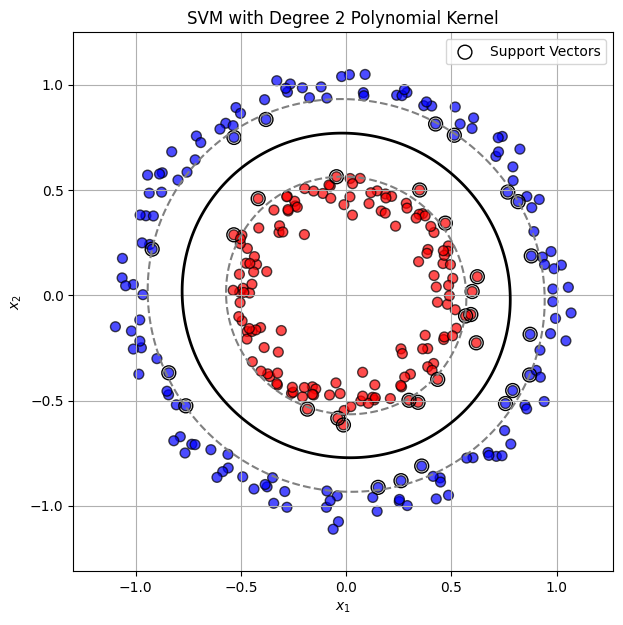

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles

# 1. Generate Data (Concentric Circles for Non-Linear Separation)
np.random.seed(42)
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05)

# Convert labels from (0,1) to (-1,1) for SVM
y = np.where(y == 0, -1, 1)

# 2. Train SVM with Polynomial Kernel (Degree 2, c=0)
clf = SVC(kernel='poly', degree=2, C=1.0, coef0=0, gamma=1)
# scikit uses a complex scaled gamma for the kernels. Here we want to use non-optimal (but simplest!) kernels
# K(x, x') = (x^T x')^2
clf.fit(X, y)

# 3. Create Meshgrid for Plotting Decision Boundary
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Flatten and Stack Grid for Prediction
grid = np.c_[xx.ravel(), yy.ravel()]
decision = clf.decision_function(grid)
decision = decision.reshape(xx.shape)

# 4. Plot Data Points and Decision Boundary
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=50, alpha=0.7)

# Plot Decision Boundary and Margins
plt.contour(xx, yy, decision, levels=[0], linewidths=2, colors='k')
plt.contour(xx, yy, decision, levels=[-1, 1], linestyles='--', colors='grey')

# Highlight Support Vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

plt.title('SVM with Degree 2 Polynomial Kernel')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.grid(True)

plt.gca().set_aspect('equal')  #  making the plot square
plt.show()

### Task

By the way, if you were not to use the kernels, but rather engineer features allowing for the linear separation of the points, what would it be?

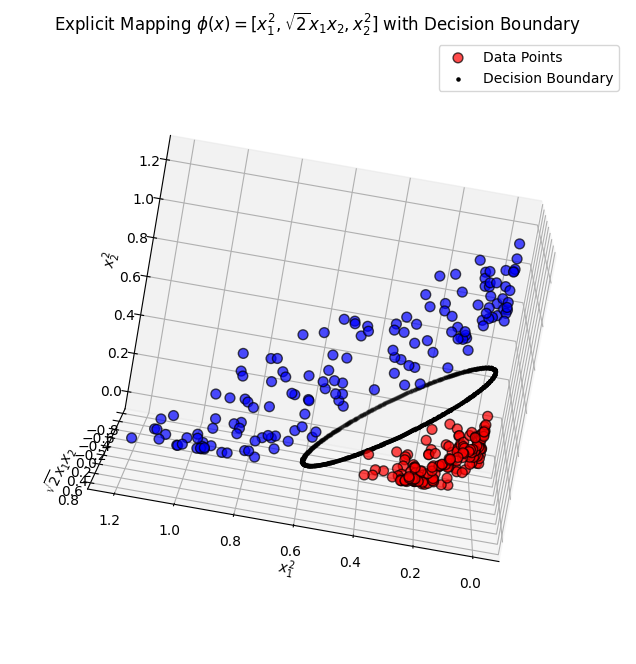

In [12]:
# 3D Plot for phi(x) with Decision Boundary
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 5. Visualize Explicit Mapping phi(x) = [x1^2, sqrt(2) x1 x2, x2^2]

# Apply phi(x) to each point
phi_X = np.array([[x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2] for x in X])

# Apply phi(x) to the meshgrid for decision boundary
phi_grid = np.array([[x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2] for x in grid])

# Scatter plot of transformed data
ax.scatter(phi_X[:, 0], phi_X[:, 1], phi_X[:, 2], c=y, cmap='bwr', edgecolors='k', s=50, alpha=0.7, label='Data Points')

# Plot only the decision boundary contour (i.e. where decision == 0)
grid_decision = clf.decision_function(grid)
contour_mask = np.isclose(grid_decision, 0, atol=0.01)  # select points near decision boundary
ax.scatter(phi_grid[contour_mask, 0], phi_grid[contour_mask, 1], phi_grid[contour_mask, 2],
           c='k', s=5, label='Decision Boundary')

# Set axis labels and title for 3D plot
ax.set_title('Explicit Mapping $\phi(x) = [x_1^2, \sqrt{2} x_1 x_2, x_2^2]$ with Decision Boundary')
ax.set_xlabel('$x_1^2$')
ax.set_ylabel('$\sqrt{2} x_1 x_2$')
ax.set_zlabel('$x_2^2$')

# Add legend and grid
ax.legend()
ax.grid(True)
ax.view_init(10, 90, -10)

plt.show()


# **Homework Assignment: Polynomial Kernel SVM in 3D Feature Space**
-------------------------------
You have seen how a polynomial kernel of degree 2 can map the original 2D data
$$(x_1, x_2)$$
to a 3D feature space via some transformation
$$
\phi(\mathbf{x}).
$$
You also saw that **the decision boundary** in the 3D space—expected to be a hyperplane—**appears** as a circular surface when visualized.

## **Primary Question**

**Why does the SVM's decision boundary in the higher-dimensional (3D) feature space *not* look like a “flat” hyperplane,**
even though we *know* the classifier’s separating surface *is* mathematically linear in that space?

## **Secondary Question**

Explain **why** a hyperplane in 3D becomes a **circular (or elliptical) curve** when viewed back in the original 2D plane of the dataset.

## **Task & Deliverables**

1. **Colab Notebook**  
   - Create a **Colab notebook** that:
     - Clearly **answers** both the **primary** and **secondary** questions with appropriate plots and short explanations.
     - Uses Python code to visualise and create plots.
   - Include a discussion (in markdown cells) illustrating the geometry behind the mapping
     $$\phi(\mathbf{x})$$
     and the resulting decision boundary.
   - Use
     `$` symbol to delimit inline equations and `$$` to delimit full-line equations.

2. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.




# Kernel Ridge Regression and Kernel Logistic Regression
----------------------------------------

## SVM Primal Loss: Hinge Loss + Penalty Reformulation

Recall the **primal form** of the **Soft-Margin SVM** optimization problem:

$$
\min_{w, b, \xi} \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} \xi_i
$$

subject to:

$$
y_i (w^T x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0, \quad \forall i
$$

Here:
- **$ \xi_i $**: Slack variables allowing for misclassifications.
- **$ C $**: Regularization parameter balancing margin size and misclassification penalty.

We embed the constraints into the objective using the **positive part operator** $ [x]_+ = \max(0, x)$ and express $C$ as the inverse of the regularization parameter $\lambda$, $C = \frac{1}{\lambda}$.


Substituting this into the primal loss gives the equivalent optimization problem:

$$
\min_{w, b} \frac{\lambda}{2} \|w\|^2 + \sum_{i=1}^{n} [1 - y_i (w^T x_i + b)]_+
$$

### Interpreting the Terms

1. **Penalty Term (Regularization):**

   $$
   \frac{\lambda}{2} \|w\|^2
   $$

   This term penalizes large weights, effectively controlling the **margin width**. A smaller $\lambda$ leads to less regularization (allowing more flexibility), while a larger $\lambda$ forces the model to maximize the margin more aggressively.

2. **Hinge Loss Term:**

   $$
   \sum_{i=1}^{n} [1 - y_i f(x_i)]_+
   $$




### Understanding the Hinge Loss

- If a data point is **correctly classified** and lies **outside the margin** ($ y_i f(x_i) \geq 1 $), the hinge loss is zero:

$$
[1 - y_i f(x_i)]_+ = 0
$$

- If a data point lies **inside the margin** ($ y_i f(x_i) < 1 $) or is **misclassified** ($ y_i f(x_i) < 0 $), the loss is proportional to its distance from the margin.




## Substituting Hinge Loss with Other Loss Functions

While SVM uses the **hinge loss** for classification, other loss functions can be substituted, leading to different model behaviors.






1. **Squared Error Loss**

  Common in **regression tasks** and **Kernel Ridge Regression**:

  $$
  L_{\text{square}}(y_i, f(x_i)) = (y_i - f(x_i))^2
  $$

  When the **hinge loss** is replaced with **squared error loss** and combined with the **kernel trick**, the model transitions into **Kernel Ridge Regression**.

  This changes the focus from **classification** to **function approximation**, allowing for more flexible decision boundaries adapted to regression tasks.

2. **Binomial Log Loss (Logistic Loss)**

  Used in **logistic regression**, this loss is smooth and differentiable:

  $$
  L_{\text{log}}(y_i, f(x_i)) = \log(1 + \exp(-y_i f(x_i)))
  $$

  While replacing the hinge loss with squared error loss leads to Kernel Ridge Regression (suitable for regression tasks), replacing the hinge loss with the **logistic loss** results in a probabilistic classifier known as **Kernel Logistic Regression**.

## Comparing Linear Ridge Regression and Kernel Ridge Regression

In this analysis, we aim to compare the performance of **Linear Ridge Regression** and **Kernel Ridge Regression (KRR)**, with a focus on the impact of using **Radial Basis Function (RBF) kernels**. While **Linear Ridge Regression** fits a simple linear relationship between features and the target variable, **Kernel Ridge Regression** leverages the **kernel trick** to model complex, non-linear patterns without explicitly transforming the feature space.

For this comparison, we will use a **synthetic sinusoidal dataset**, designed to highlight the differences between linear and non-linear modeling approaches. The dataset consists of data points sampled from a **sine wave** with added **Gaussian noise**. This creates a non-linear regression problem that linear models struggle to capture accurately.



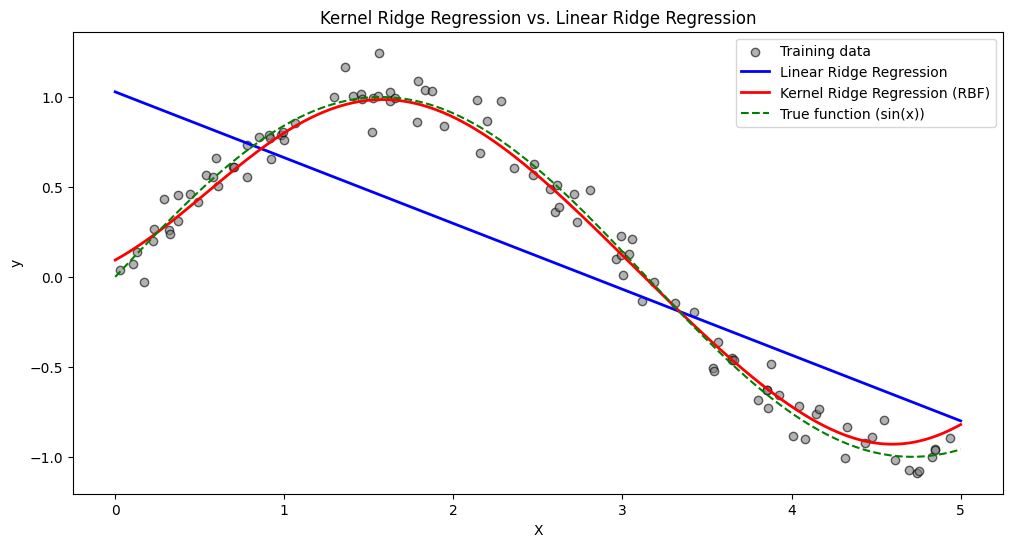

Linear Ridge Regression MSE: 0.188
Kernel Ridge Regression MSE: 0.009


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# 1. Generate Non-Linear Data
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)  # Random X values between 0 and 5
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # Non-linear sine wave with noise

# Create dense grid for plotting predictions
X_plot = np.linspace(0, 5, 500).reshape(-1, 1)

# 2. Train Linear Ridge Regression (Baseline)
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)
y_ridge = ridge.predict(X_plot)

# 3. Train Kernel Ridge Regression with RBF Kernel
krr = KernelRidge(kernel='rbf', alpha=1.0)  # Gamma non-specified, i.e. data-adjusted. Higher gamma captures finer details
krr.fit(X, y)
y_krr = krr.predict(X_plot)

# 4. Plot Results
plt.figure(figsize=(12, 6))

# Original data
plt.scatter(X, y, color='gray', label='Training data', edgecolor='k', alpha=0.6)

# Linear Ridge Regression
plt.plot(X_plot, y_ridge, color='blue', linewidth=2, label='Linear Ridge Regression')

# Kernel Ridge Regression
plt.plot(X_plot, y_krr, color='red', linewidth=2, label='Kernel Ridge Regression (RBF)')

# Ground truth sine function (for reference)
plt.plot(X_plot, np.sin(X_plot), color='green', linestyle='--', label='True function (sin(x))')

# Plot formatting
plt.title('Kernel Ridge Regression vs. Linear Ridge Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# 5. Evaluate and Compare
ridge_mse = mean_squared_error(y, ridge.predict(X))
krr_mse = mean_squared_error(y, krr.predict(X))
print(f"Linear Ridge Regression MSE: {ridge_mse:.3f}")
print(f"Kernel Ridge Regression MSE: {krr_mse:.3f}")
